In [1]:
import numpy as np
import pandas as pd
import json
from tqdm import tqdm
import cv2
import os

In [2]:
pose_path = '/kaggle/input/wlasl-utils/pose_per_individual_videos/pose_per_individual_videos/'
videos_path = '/kaggle/input/wlasl-processed/videos'

In [6]:
video_id = '00335'
keypoint_path = f"{pose_path}{video_id}/"
keypoints_l = os.listdir(keypoint_path)
print('Length of list of all keypoints folder for the given video', len(keypoints_l))
with open(keypoint_path+keypoints_l[0], 'r') as f:
    keypoints = json.load(f)
print(keypoints['people'][0]['pose_keypoints_2d'])

Length of list of all keypoints folder for the given video 58
[131.826, 73.4587, 0.831061, 138.761, 131.134, 0.752396, 95.6931, 131.154, 0.632493, 85.9356, 203.381, 0.606877, 92.9213, 244.385, 0.191127, 181.852, 132.531, 0.633787, 186.018, 208.227, 0.631259, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 124.902, 65.1333, 0.891119, 142.254, 65.1147, 0.889327, 117.937, 73.4646, 0.517231, 157.528, 74.8387, 0.786127, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


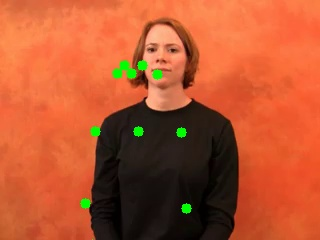

In [7]:
# import cv2
# import json
# from IPython.display import display, clear_output, Image

# # Read the video file
# video_path = videos_path + '/' + str(video_id) + '.mp4'
# cap = cv2.VideoCapture(video_path)

# # # Load the JSON data containing the keypoints
# # with open('path/to/your/keypoints.json', 'r') as f:
# #     keypoints_data = json.load(f)

# # Loop through each frame
# for i in range(1):
#     # Read the current frame
#     ret, frame = cap.read()

#     # Check if the frame was read successfully
#     if not ret:
#         break
    
#     # Get the keypoints data for the current frame
#     keypoints = keypoints["people"][0]["pose_keypoints_2d"]

#     # Draw the keypoints on the frame
#     for i in range(0, len(keypoints), 3):
#         x, y, confidence = keypoints[i], keypoints[i + 1], keypoints[i + 2]
#         if confidence > 0.1:  # Filter out keypoints with low confidence
#             cv2.circle(frame, (int(x), int(y)), 5, (0, 255, 0), -1)

#     # Display the frame with keypoints
# #     img_pil = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
# #     display(img_pil)
#     clear_output(wait=True)
#     display(Image(data=cv2.imencode('.jpg', frame)[1].tobytes(), width=560, height=420))

# #     frame_count += 1

# # Release the video capture and close the window
# cap.release()
# # cv2.destroyAllWindows()


In [8]:
import cv2
import numpy as np

def crop_and_convert_to_array(video_path, bbox_x_min, bbox_y_min, bbox_x_max, bbox_y_max, frame_start, frame_end, fps=None):
    cap = cv2.VideoCapture(video_path)
    
    if not fps:
        fps = int(cap.get(cv2.CAP_PROP_FPS))
        
    if frame_start == 1:
        frame_start=0

    # Set the frame position to the starting frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_start)

    # Initialize an empty list to store the cropped frames as numpy arrays
    cropped_frames = []
    if frame_end == -1:
        frame_end = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('frame_end: ', frame_end)

    frame_num = frame_start
    while frame_num <= frame_end and cap.isOpened():
#         print('frame number', frame_num)
        ret, frame = cap.read()
        if not ret:
            break

        cropped_frame = frame[bbox_y_min:bbox_y_max, bbox_x_min:bbox_x_max]
        cropped_frame_rgb = cv2.cvtColor(cropped_frame, cv2.COLOR_BGR2RGB)
        cropped_frames.append(cropped_frame.copy())
        frame_num += 1

    cap.release()

    cropped_frames_array = np.array(cropped_frames)
    print(cropped_frames_array.shape)
    return cropped_frames_array

In [9]:
# bbox_x_min, bbox_y_min, bbox_x_max, bbox_y_max = [385, 37, 885, 720]
bbox_x_min, bbox_y_min, bbox_x_max, bbox_y_max = [57, 5, 246, 240]
frame_start = 1
frame_end = -1
fps=25
cropped_frames_array = crop_and_convert_to_array(video_path, bbox_x_min, 
                                                 bbox_y_min, bbox_x_max, 
                                                 bbox_y_max, frame_start, 
                                                 frame_end, fps)
# cropped_frames_array

frame_end:  58
(58, 235, 189, 3)


In [33]:
def plot_keypoints(keypoints):
    portion = ["hand_right_keypoints_2d", "hand_left_keypoints_2d", "pose_keypoints_2d"]
    colors = {"hand_right_keypoints_2d": 0, "hand_left_keypoints_2d":122, "pose_keypoints_2d":255}
    # Right Hand
    for portion_ in portion:
        keypoints_arr = keypoints["people"][0][portion_]
        keypoints_arr = np.array(keypoints_arr).reshape(-1, 3)
        for kp in keypoints_arr:
            x, y = int(kp[0]), int(kp[1])
            confidence = float(kp[2])
            if confidence < 0.3:
                continue
            cv2.circle(resized_array, (x, y), 2, (0, 0, colors[portion_]), -1)

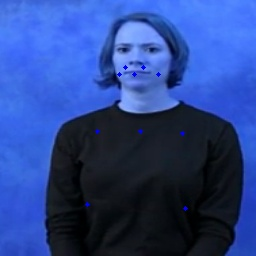

In [36]:
video_id = '00335'
keypoint_path = f"{pose_path}{video_id}/"
keypoints_l = sorted(os.listdir(keypoint_path))
print('Length of list of all keypoints folder for the given video', len(keypoints_l))
with open(keypoint_path+keypoints_l[0], 'r') as f:
    keypoints = json.load(f)

for i in range(len(cropped_frames_array)):
#     print(f"Frame {i}")
    resized_array = cv2.resize(cropped_frames_array[i], (256, 256))
    with open(keypoint_path+keypoints_l[i], 'r') as f:
        keypoints = json.load(f)
    
    plot_keypoints(keypoints)
    frame_rgb = cv2.cvtColor(resized_array, cv2.COLOR_BGR2RGB)
    clear_output(wait=True)
    display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

In [42]:
cropped_frames_array[0].shape

(683, 500, 3)